In [1]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv("data/aom.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2008-11-11,19.522,20.758,19.522,20.758,234,0
1,2008-11-13,20.938,21.903,20.714,20.863,29971,0
2,2008-11-19,23.036,23.036,20.627,21.792,2417,0
3,2008-11-20,20.331,20.331,20.331,20.331,207,0
4,2008-11-21,20.071,20.071,19.957,19.957,1091,0


In [2]:
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High     Low   Close  Volume  OpenInt
0  2008-11-11  19.522  20.758  19.522  20.758     234        0
1  2008-11-13  20.938  21.903  20.714  20.863   29971        0
2  2008-11-19  23.036  23.036  20.627  21.792    2417        0
3  2008-11-20  20.331  20.331  20.331  20.331     207        0
4  2008-11-21  20.071  20.071  19.957  19.957    1091        0
(2261, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


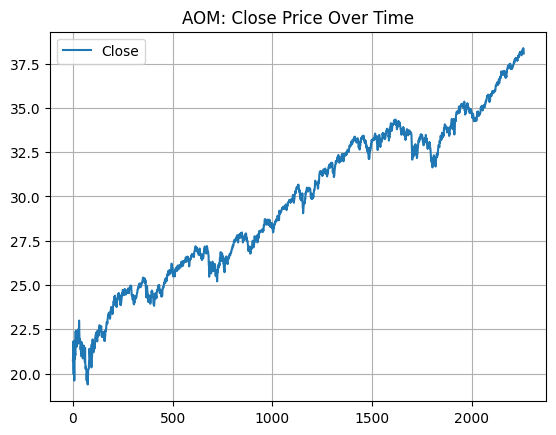

In [3]:
df[['Close']].plot()
plt.title("AOM: Close Price Over Time")
plt.grid(True)
plt.show()

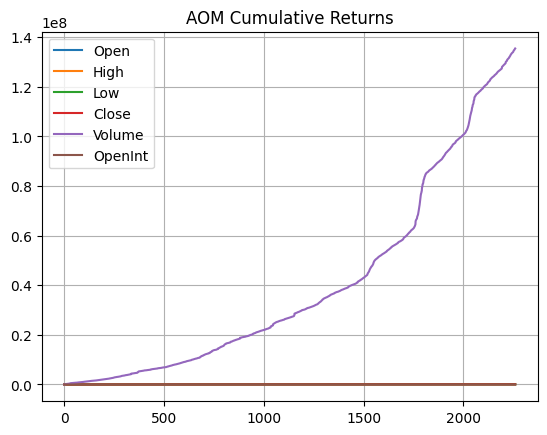

In [4]:
dr = df.cumsum()
dr.plot()
plt.title('AOM Cumulative Returns')
plt.grid(True)

Text(0.5, 1.0, 'AOM Autocorrelation plot')

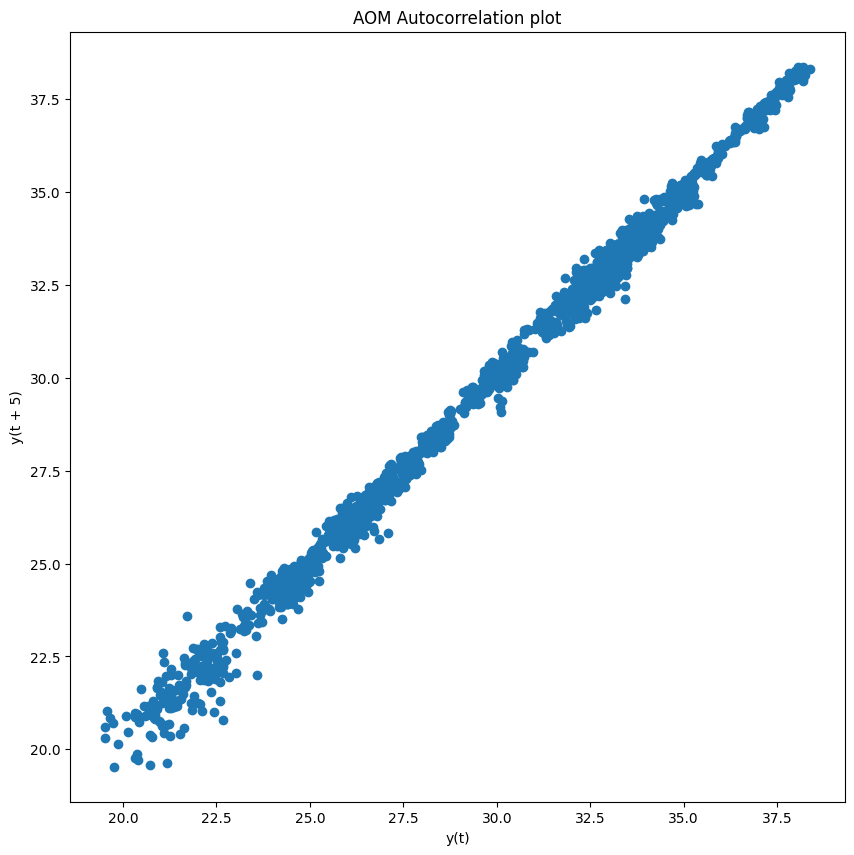

In [5]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('AOM Autocorrelation plot')

In [6]:
print(df['Date'][5])

2008-11-24


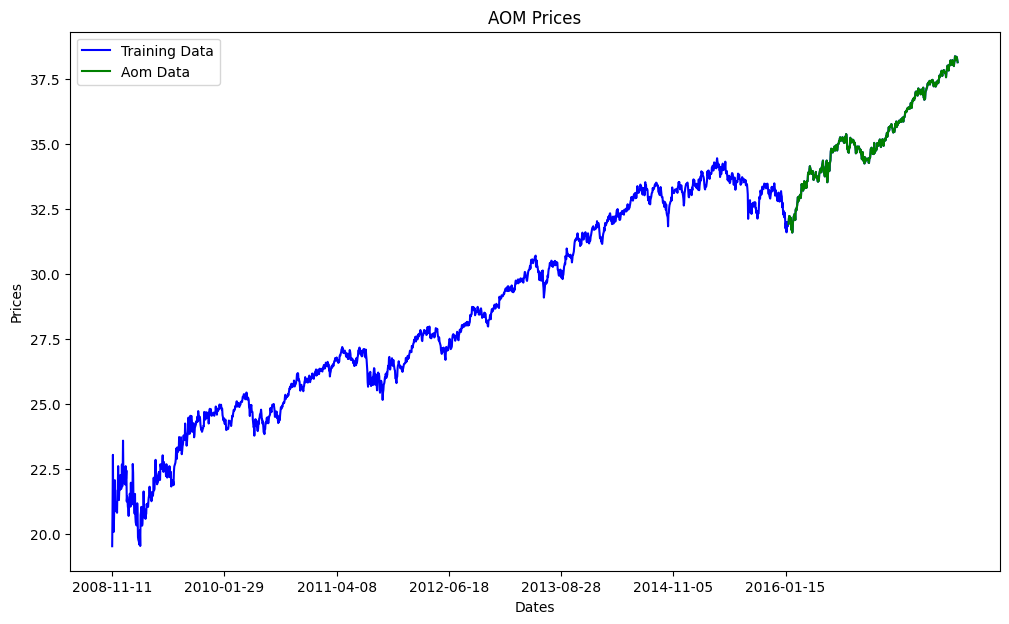

In [7]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('AOM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Aom Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [8]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [9]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/home/zreal/Documents/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing Mean Squared Error: 0.016
Symmetric mean absolute percentage error: 0.271


/tmp/ipykernel_6516/3672680937.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


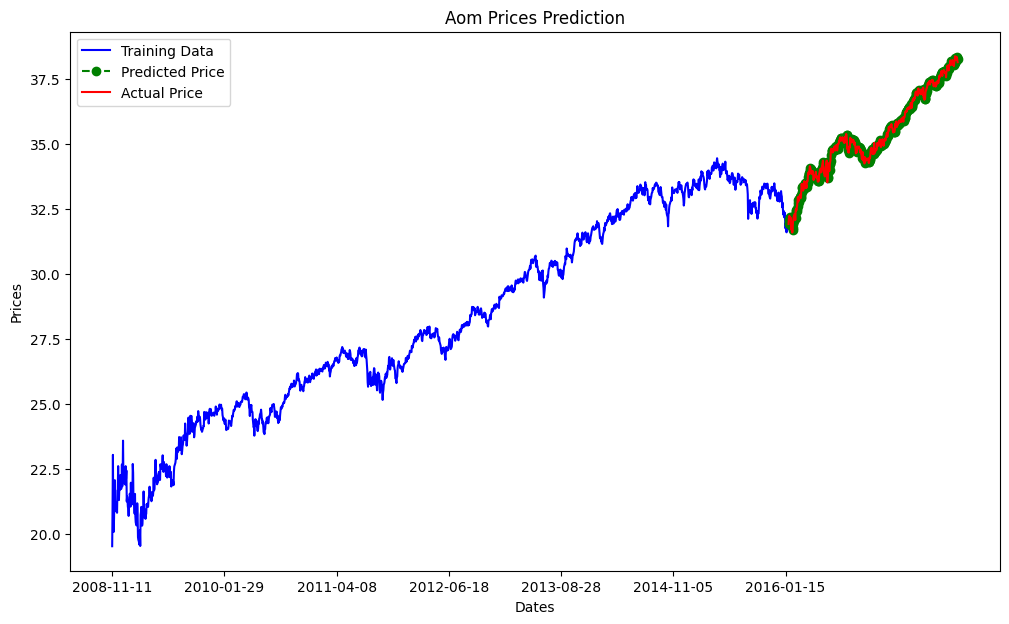

In [10]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Aom Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

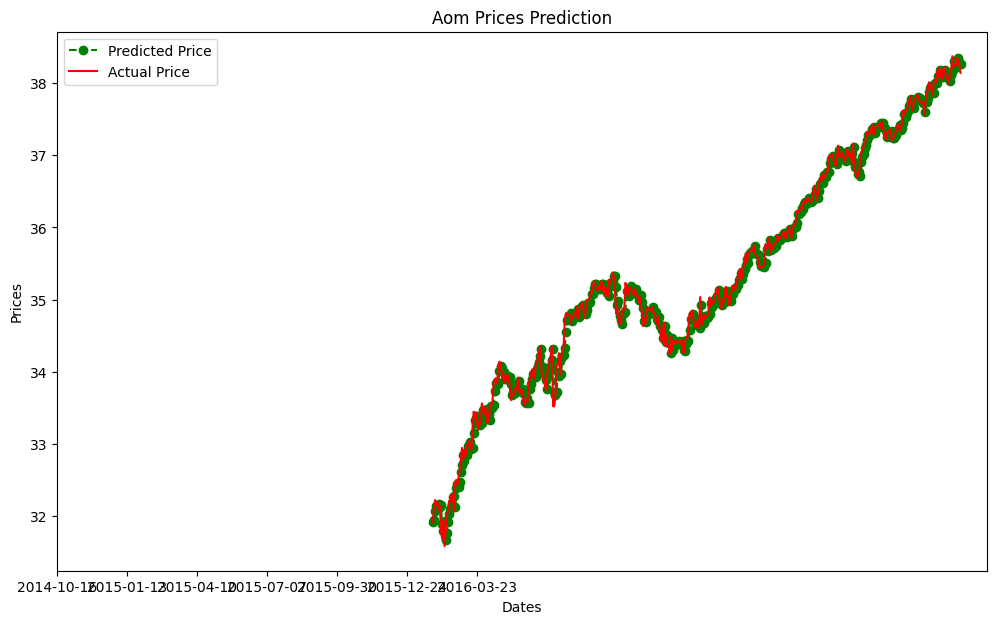

In [11]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Aom Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()